### Bidiretional LSTM for Time Series Forecasting

Libs required:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Bidirectional

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,4)

Using TensorFlow backend.


In [2]:
et0_train = pd.read_csv('./data/label_train.csv')
et0_val = pd.read_csv('./data/label_val.csv')

et0_train_ = pd.read_csv('./data/label_train_.csv')
et0_test = pd.read_csv('./data/label_test.csv')

In [3]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
def overfitting_plot(history):
    loss = history.history['loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend(loc='best')

In [5]:
n_steps = 3
n_features = 1

features, label = split_sequence(et0_train_.values, n_steps)
features = features.reshape((features.shape[0], features.shape[1], n_features))

In [6]:
for i in range(0,5):
    print("{}, {}\n".format(features[i], label[i]))

[[6.95434295]
 [9.08150375]
 [9.0281699 ]], [7.93418562]

[[9.08150375]
 [9.0281699 ]
 [7.93418562]], [7.70423053]

[[9.0281699 ]
 [7.93418562]
 [7.70423053]], [5.19487979]

[[7.93418562]
 [7.70423053]
 [5.19487979]], [5.58889656]

[[7.70423053]
 [5.19487979]
 [5.58889656]], [3.37520442]



In [7]:
model = Sequential()
model.add(Bidirectional(LSTM(256,
                             return_sequences=True,
                        input_shape=(n_steps, n_features))))

#model.add(Bidirectional(LSTM(256, return_sequences=True)))
#model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(1))

In [8]:
model.compile(optimizer=Adam(lr=1e-3), 
              loss='mean_absolute_error', 
              metrics=['mae', 'mse'], )

In [9]:
history = model.fit(features,
                    label,
                    epochs=30, 
                    verbose=1)

Epoch 1/30
919/919 [==============================] - 5s 5ms/step - loss: 2.2023 - mae: 2.2023 - mse: 8.4213
Epoch 2/30
919/919 [==============================] - 1s 1ms/step - loss: 1.3996 - mae: 1.3996 - mse: 3.1423
Epoch 3/30
919/919 [==============================] - 1s 1ms/step - loss: 1.3940 - mae: 1.3940 - mse: 3.1769
Epoch 4/30
919/919 [==============================] - 1s 1ms/step - loss: 1.3670 - mae: 1.3670 - mse: 3.0224
Epoch 5/30
919/919 [==============================] - 1s 1ms/step - loss: 1.3367 - mae: 1.3367 - mse: 2.9448
Epoch 6/30
919/919 [==============================] - 1s 1ms/step - loss: 1.3005 - mae: 1.3005 - mse: 2.7887
Epoch 7/30
919/919 [==============================] - 1s 1ms/step - loss: 1.2884 - mae: 1.2884 - mse: 2.7177
Epoch 8/30
919/919 [==============================] - 1s 1ms/step - loss: 1.2765 - mae: 1.2765 - mse: 2.6590
Epoch 9/30
919/919 [==============================] - 1s 1ms/step - loss: 1.2910 - mae: 1.2910 - mse: 2.7290
Epoch 10/30
919/919

In [10]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse'])

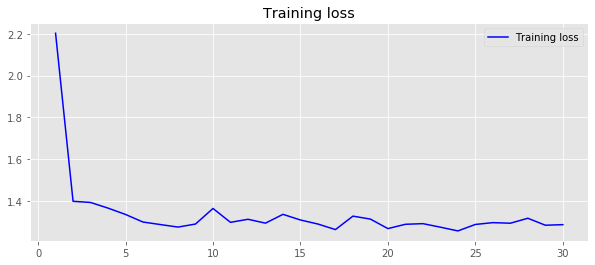

In [11]:
overfitting_plot(history)

In [12]:
features_test, label_test = split_sequence(et0_test.values, n_steps)
features_test = features_test.reshape((features_test.shape[0], features_test.shape[1], n_features))

In [13]:
model.evaluate(features_test, label_test)

228/228 [==============================] - 0s 2ms/step


[1.3142708707274051, 1.3142709732055664, 2.886808395385742]

In [14]:
np.sqrt(2.886808395385742)

1.699061033449282